**Project Name** - USA Regional Sales Analysis

🗂️ **Project Summary**
This Exploratory Data Analysis (EDA) project analyzes Acme Co.’s USA sales data (2014–2018) to uncover trends, performance drivers, and actionable business insights.

Data Profiling & Cleaning
Validated dataset structure, handled missing budget values, corrected data types, and ensured data consistency.

Univariate & Bivariate Analysis
Analyzed distributions of key metrics such as revenue, profit margin, and unit price across products, sales channels, regions, and customer segments.

Trend & Seasonality Analysis
Examined monthly and yearly sales trends to identify recurring patterns, seasonal peaks, and low-performance periods.

Outlier Detection
Identified unusually high and low transactions in revenue and unit price to understand exceptional sales behavior.

Correlation & Customer Segmentation
Studied relationships between key metrics and segmented customers based on revenue and profit margin for performance comparison.

❓ **Problem Statement**

Examine Acme Co.’s 2014–2018 sales data to understand revenue and profit drivers, seasonal behavior, outliers, and budget alignment to support strategic growth decisions.

**🎯 Objective**

To analyze USA regional sales data and generate actionable business insights by:

*   Identifying top-performing products, sales channels, and regions contributing to revenue and profitability
*  Analyzing seasonal patterns and sales trends to support effective planning and forecasting
*   Detecting pricing irregularities and margin risks through outlier analysis
*   Supporting data-driven decisions for pricing, promotions, and regional market expansion

The insights from this analysis are used to design an interactive Power BI dashboard that enables strategic decision-making and drives sustainable business growth.














📥 **Setup & Configuration**



In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

🔄 **Data Ingestion**


In [2]:
# 📂 2. LOAD DATA
# Read all sheets at once
sheets = pd.read_excel('/content/Regional Sales Dataset.xlsx', sheet_name = None)

In [3]:
# Assign dataframes to each sheet

df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

In [4]:
df_sales.shape

(64104, 12)

In [6]:
print("df_sales shape: ",(df_sales.shape))

df_sales shape:  (64104, 12)


🔍 **Data Profiling/Initial Inspection**


In [7]:
# 🔍 2.1 QUICK SHAPE OVERVIEW
print("df_sales shape: ",(df_sales.shape))
print("df_customers shape: ",(df_customers.shape))
print("df_products shape: ",(df_products.shape))
print("df_regions shape: ",(df_regions.shape))
print("df_budgets shape: ",(df_budgets.shape))


df_sales shape:  (64104, 12)
df_customers shape:  (175, 2)
df_products shape:  (30, 2)
df_regions shape:  (994, 15)
df_budgets shape:  (30, 2)


In [8]:
df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [9]:
# 🔍 3. DATA EXPLORATION / OVERVIEW

# 3.1 Quick look

df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [10]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [11]:
df_state_reg.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [12]:
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop=True)

df_state_reg.head(5)



,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [13]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [14]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [15]:
# The first row of df_state_reg contains the real column names.
new_header        = df_state_reg.iloc[0]      # grab the first row
df_state_reg.columns = new_header             # set columns
df_state_reg       = df_state_reg[1:].reset_index(drop=True)  # drop header row and reset


In [16]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [17]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


In [18]:
df_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [19]:
df_state_reg.isnull().sum()

,0
0,
AL,0
Alabama,0
South,0


In [20]:
df_budgets.isnull().sum()

,0
Product Name,0
2017 Budgets,0


In [21]:
# Checking duplicate values
len(df_sales) == len(df_sales.drop_duplicates())

True

 🧹**data cleaning and wrangling**



In [22]:
# merge df_sales with df_customers
df = df_sales.merge(
    df_customers,
    how='left',
    left_on = 'Customer Name Index',
    right_on = 'Customer Index'
)

In [23]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [24]:
# merge with products (building on existing df)
df = df.merge(
    df_products,
    how='left',
    left_on = 'Product Description Index',
    right_on ='Index'
)

In [25]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [26]:
# merge with regions (building on existing df)
df = df.merge(
    df_regions,
    how='left',
    left_on = 'Delivery Region Index',
    right_on ='id'
)

In [27]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [28]:
# merge with state regions (building on existing df)
df = df.merge(
    df_state_reg[["State Code","Region"]],
    how='left',
    left_on = 'state_code',
    right_on ='State Code'
)

KeyError: "None of [Index(['State Code', 'Region'], dtype='object', name=0)] are in the [columns]"

In [29]:
# merge with 2017 budget
df = df.merge(
    df_budgets,
    how='left',
    on = 'Product Name',
)

In [30]:
df_state_reg.head(5)

,AL,Alabama,South
0,AR,Arkansas,South
1,AZ,Arizona,West
2,CA,California,West
3,CO,Colorado,West
4,CT,Connecticut,Northeast


In [31]:
#customer index
#index
#id
#state code

#clean up redundant columns
cols_to_drop = ['Customer Index','Index','id','state_code'] # Corrected 'state code' to 'state_code'
df = df.drop(columns = cols_to_drop,errors='ignore')

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,1085037.329


In [32]:
# convert all columns to lower case for consistency and easier access
df.columns = df.columns.str.lower()

df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state', 'type', 'latitude', 'longitude',
       'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', '2017 budgets'],
      dtype=object)

In [33]:
# keep the important column and delete the columns that we dont need

cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
     'channel',
     'product name',
     'order quantity',
     'unit price',
     'line total',
    'total unit cost',
    'state code',
    'county',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
 ]

In [34]:
df = df[cols_to_keep]

KeyError: "['state code', 'region'] not in index"

In [35]:
df.head(5)

,ordernumber,orderdate,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order quantity,unit price,...,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,2017 budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,1085037.329


In [36]:
# rename the columns

df= df.rename(columns={
    'ordernumber': 'order_number',
    'orderdate' : 'order_date',
    'customer names' : 'customer_name',
    'product name' : 'product_name',
    'order quantity' : 'order_quantity',
    'unit price' : 'unit_price',
    'line total' : 'revenue',
    'total unit cost' : 'cost',
    'state code' : 'state',
    'state' : 'state_name',
    'latitude' : 'lat',
    'longitude' : 'lon',
     '2017 budgets' : 'budget'
})
df.head(1)

,order_number,order_date,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order_quantity,unit_price,...,lat,lon,area_code,population,households,median_income,land_area,water_area,time_zone,budget
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,964940.231


In [37]:
# blank out budgets for non-2017 orders
df.loc[df['order_date'].dt.year !=2017,'budget'] = pd.NA

# line total is revenue
df[['order_date','product_name', 'revenue','budget']].head(5)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   order_number               64104 non-null  object        
 1   order_date                 64104 non-null  datetime64[ns]
 2   customer name index        64104 non-null  int64         
 3   channel                    64104 non-null  object        
 4   currency code              64104 non-null  object        
 5   warehouse code             64104 non-null  object        
 6   delivery region index      64104 non-null  int64         
 7   product description index  64104 non-null  int64         
 8   order_quantity             64104 non-null  int64         
 9   unit_price                 64104 non-null  float64       
 10  revenue                    64104 non-null  float64       
 11  cost                       64104 non-null  float64       
 12  cust

In [39]:
# filter the dataset to include only records form year 2017
df_2017 = df[df['order_date'].dt.year == 2017]

In [40]:
df.isnull().sum()

,0
order_number,0
order_date,0
customer name index,0
channel,0
currency code,0
warehouse code,0
delivery region index,0
product description index,0
order_quantity,0
unit_price,0


In [41]:
df_2017.head(5)

,order_number,order_date,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order_quantity,unit_price,...,lat,lon,area_code,population,households,median_income,land_area,water_area,time_zone,budget
46363,SO - 0002544,2017-01-01,107,Wholesale,USD,NXH382,711,30,6,1239.5,...,40.77955,-74.02375,551,69156,23029,41107,3333346,0,America/New York,1011609.684
46364,SO - 0006431,2017-01-01,116,Wholesale,USD,NXH382,234,13,5,1829.1,...,39.06387,-108.55065,970,60358,24290,45358,101735554,921925,America/Denver,3720639.645
46365,SO - 0007491,2017-01-01,45,Wholesale,USD,NXH382,108,15,9,2412.0,...,33.96168,-118.35313,424,111666,36667,42044,23485845,63502,America/Los Angeles,3299478.315
46366,SO - 0008741,2017-01-01,169,Wholesale,USD,GUT930,375,8,8,904.5,...,42.50056,-90.66457,563,58799,23901,47450,78952077,2802123,America/Chicago,1085037.329
46367,SO - 0009295,2017-01-01,20,Wholesale,USD,NXH382,339,2,12,1112.2,...,28.47689,-82.52546,352,100270,39038,41308,154983928,6194314,America/New York,3050087.565


**🛠 Feature Engineering**




In [42]:
df.head(5)

,order_number,order_date,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order_quantity,unit_price,...,lat,lon,area_code,population,households,median_income,land_area,water_area,time_zone,budget
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,NaN
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,NaN
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,NaN
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,NaN
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,NaN


In [43]:
df['total_cost'] = df['order_quantity'] * df['cost']

In [44]:
df['profit'] = df['revenue'] - df['total_cost']

df['profit_margin_pct'] = df['profit'] /df['revenue']*100

In [45]:
df.head(5)

,order_number,order_date,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order_quantity,unit_price,...,population,households,median_income,land_area,water_area,time_zone,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,145674,52798,36466,268318796,13908113,America/New York,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,79510,26020,124759,62489257,386195,America/Los Angeles,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,58007,24141,63158,70972793,720300,America/New York,NaN,10082.160,8249.040,45.0


###  **📊Exploratory Analysis**


**🔹 1. Monthly Sales Trend Over Time**

Objective: Examine revenue changes over time to identify seasonal patterns and periods of increased or decreased sales.

Visualization: Line chart

EDA Category: Time-based (temporal) analysis

Design: Line plot with markers to clearly emphasize monthly revenue values

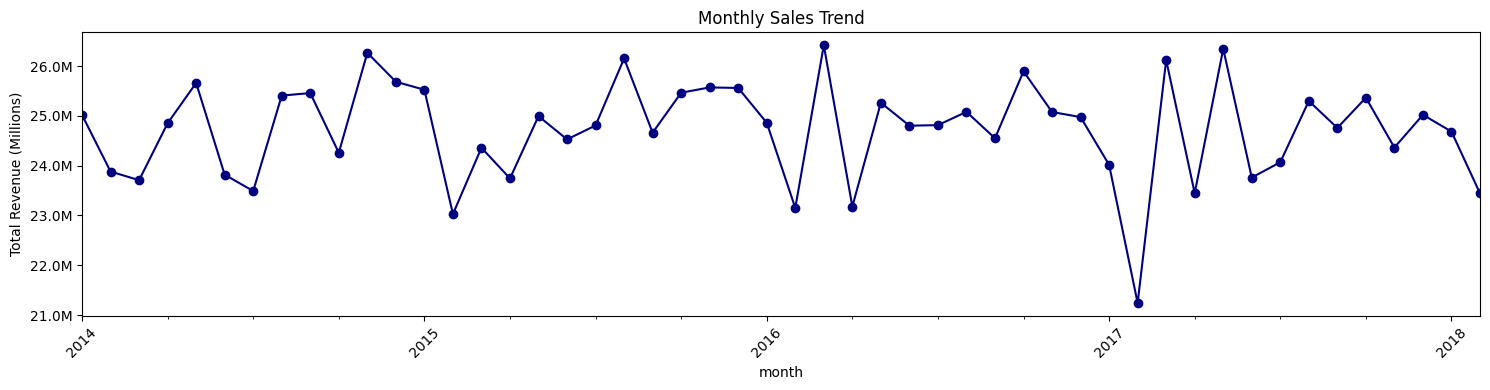

In [46]:
# Convert order_date to monthly period (e.g., 2022-01, 2022-02)
df['order_month'] =  df['order_date'].dt.to_period('M')

# Calculate total revenue for each month
monthly_sales = df.groupby('order_month')['revenue'].sum()

# Set figure size for clarity
plt.figure(figsize=(15,4))

# Plot the monthly sales trend with circle markers and navy line
monthly_sales.plot(marker='o',color='navy')

# Scale y-axis values to millions for readability
from matplotlib import ticker
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Add title and axis labels
plt.title('Monthly Sales Trend')
plt.xlabel('month')
plt.ylabel('Total Revenue (Millions)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

:

📌**Insights**
*   Sales follow a clear seasonal pattern, peaking in May–June and dipping each January.
*   Revenue remains largely stable year over year, indicating consistent demand.
*   An unusual decline in early 2017 stands out and should be investigated further.






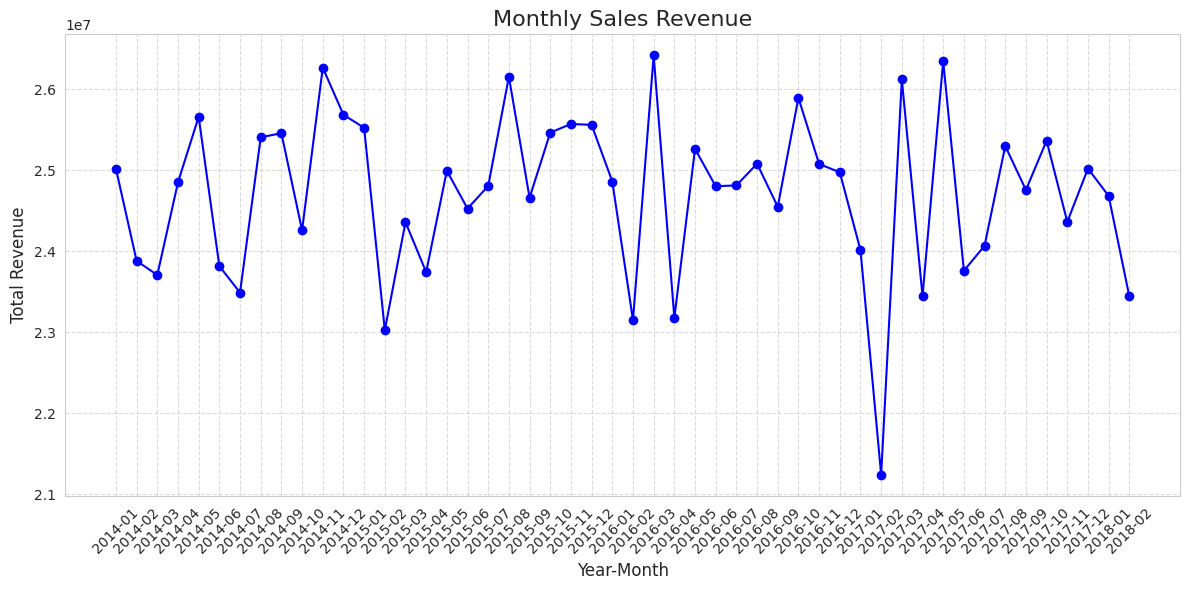

In [67]:
# Convert order_date to datetime (handles most common string formats)
df['order_date'] = pd.to_datetime(df['order_date'])

# Create a year-month column for grouping (e.g., '2023-01')
df['Order_month_num'] = df['order_date'].dt.to_period('M')

# Group by year-month and calculate total monthly sales (using revenue)
monthly_sales = df.groupby('year_month')['revenue'].sum().reset_index()

# Convert year_month to string for better x-axis labels
monthly_sales['year_month_str'] = monthly_sales['year_month'].astype(str)

# Sort by date just in case
monthly_sales = monthly_sales.sort_values('year_month')

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['year_month_str'], monthly_sales['revenue'], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Monthly Sales Revenue', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add grid for better visibility
plt.grid(True, linestyle='--', alpha=0.7)
# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

🔹 2. **Monthly Sales Trend (All Years Combined)**

Objective: Identify overall seasonal patterns by combining sales data across all years for each calendar month.

Visualization: Line chart

EDA Category: Time-based (temporal) analysis

Design: Line plot with markers, with months arranged from January to December using month order

/tmp/ipython-input-173855853.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['order_month_num'] = df_['order_date'].dt.month
/tmp/ipython-input-173855853.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['order_month_name'] = df_['order_date'].dt.strftime('%b')


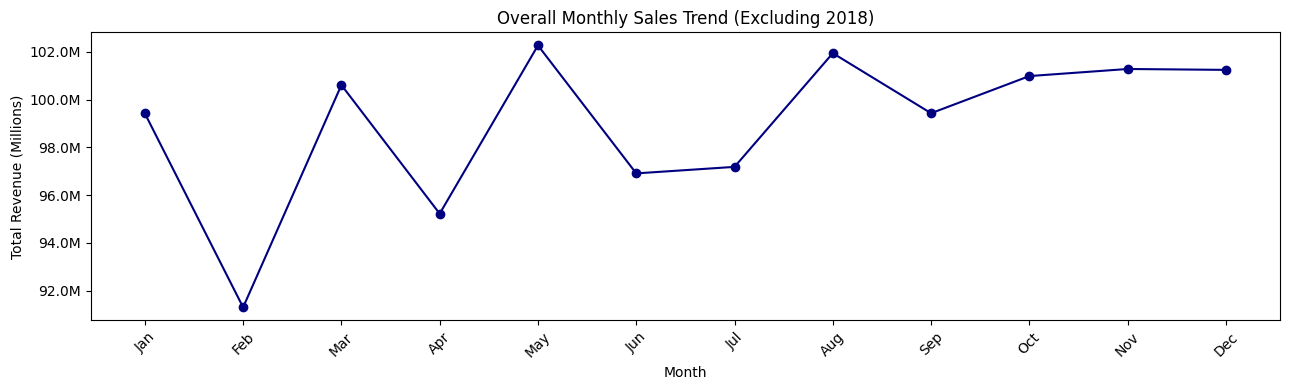

In [48]:
# 1. Filter out any 2018 orders
df_ = df[df['order_date'].dt.year != 2018]   # exclude any partial-year data (i.e., January and February of 2018) so that the monthly totals aren’t skewed by an incomplete year.
                                            #I create df_ so I don’t alter the original df, preserving it intact for other analyses while filtering just for this chart.

# Create month number and name columns for grouping
df_['order_month_num'] = df_['order_date'].dt.month
df_['order_month_name'] = df_['order_date'].dt.strftime('%b')

# 2. Group by month number and month name, sum revenue, then sort by month number
monthly_sales = (
    df_
    .groupby(['order_month_num', 'order_month_name'])['revenue']
    .sum()
    .sort_index()
)

# 3. Plot setup
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(13, 4))
plt.plot(
    monthly_sales.index.get_level_values(1),  # X-axis: month names
    monthly_sales.values,                     # Y-axis: total revenue
    marker='o',                                # circle markers
    color='navy'                               # line color
)

# 4. Scale y-axis values to millions for readability
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# 5. Add title and axis labels
plt.title('Overall Monthly Sales Trend (Excluding 2018)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

# 6. Rotate x-axis labels for readability
plt.xticks(rotation=45)

# 7. Adjust layout to prevent clipping
plt.tight_layout()

# 8. Display the plot
plt.show()

📌**Insights**
*   When aggregating sales across all years, January shows a strong starting point with revenue around the mid-90M range.
*   Sales recover during May and again in August, reaching approximately 99–101M in the later months of the year.
* Overall, the data highlights a consistent post-New Year boost, a dip during spring, and a noticeable increase in mid-summer each year.







In [49]:
# Ensure order_date is datetime (if not already done)
df['order_date'] = pd.to_datetime(df['order_date'])

# Filter out rows where the year is 2018 AND month is 1 or 2
df_new = df[~((df['order_date'].dt.year == 2018) & (df['order_date'].dt.month.isin([1, 2])))]


/tmp/ipython-input-378938501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['order_date'] = pd.to_datetime(df_new['order_date'])
/tmp/ipython-input-378938501.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month'] = df_new['order_date'].dt.month
/tmp/ipython-input-378938501.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

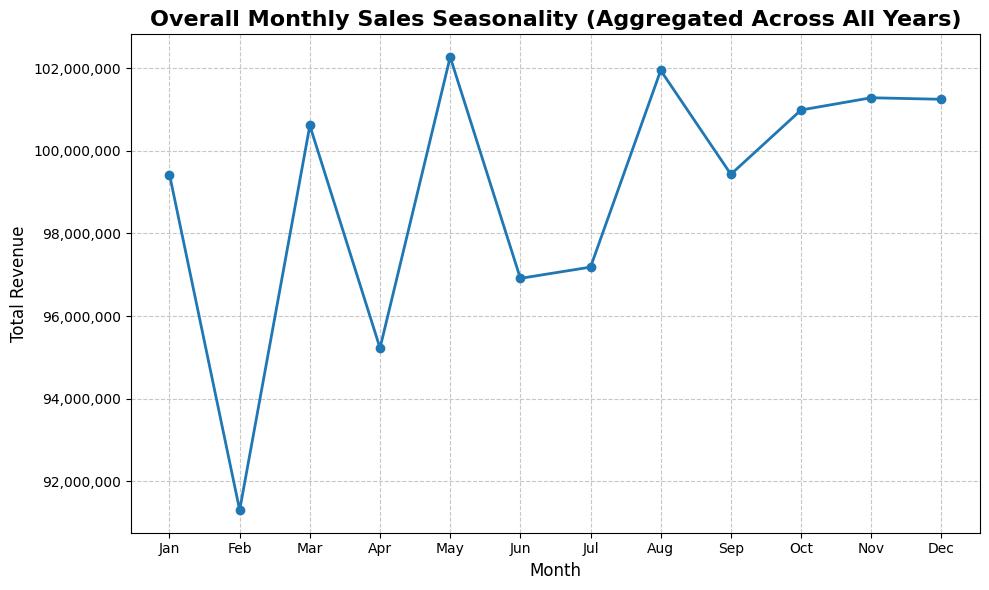

In [50]:
# Assuming your DataFrame is called 'df'
# Convert order_date to datetime (safe even if already datetime)
df_new['order_date'] = pd.to_datetime(df_new['order_date'])

# Extract calendar month (1-12) and month name for labels
df_new['month'] = df_new['order_date'].dt.month
df_new['month_name'] = df_new['order_date'].dt.strftime('%b')  # Abbreviated month names: Jan, Feb, etc.

# Group by month and sum revenue (or change to 'profit' if preferred)
monthly_seasonal_sales = (
    df_new.groupby(['month', 'month_name'])['revenue']
    .sum()
    .reset_index()
)

# Sort by month number for chronological order (Jan to Dec)
monthly_seasonal_sales = monthly_seasonal_sales.sort_values('month')

# Plot the line chart for seasonality
plt.figure(figsize=(10, 6))
plt.plot(
    monthly_seasonal_sales['month_name'],
    monthly_seasonal_sales['revenue'],
    marker='o',
    linestyle='-',
    linewidth=2,
    color='#1f77b4'
)

# Customize the chart
plt.title('Overall Monthly Sales Seasonality (Aggregated Across All Years)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# Add grid for readability
plt.grid(True, linestyle='--', alpha=0.7)

# Format y-axis with commas for large numbers
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Tight layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

🔹3. **Top 10 Products by  Revenue**

Objective: Determine the top-revenue–generating products to prioritize marketing strategies and inventory planning.

Visualization: Horizontal bar chart


EDA Category: Univariate analysis

/tmp/ipython-input-1186821662.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


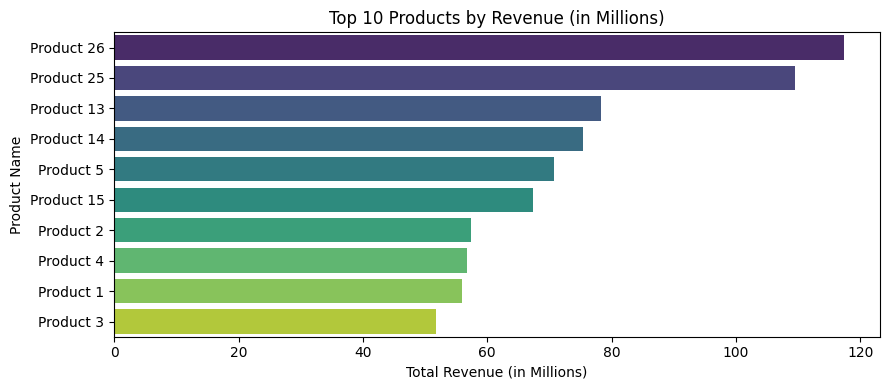

In [52]:
# Calculate total revenue for each product and convert values to millions
top_prod = df.groupby('product_name')['revenue'].sum() / 1_000_000

# Select the top 10 products by revenue
top_prod = top_prod.nlargest(10)

# Set the figure size for clarity
plt.figure(figsize=(9, 4))

# Plot a horizontal bar chart: x-axis as revenue in millions, y-axis as product names
sns.barplot(
    x=top_prod.values,    # X-axis: revenue values in millions
    y=top_prod.index,     # Y-axis: product names
    palette='viridis'     # Color palette for bars
)

# Add title and axis labels
plt.title('Top 10 Products by Revenue (in Millions)')  # Main title
plt.xlabel('Total Revenue (in Millions)')              # X-axis label
plt.ylabel('Product Name')                             # Y-axis label

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

📌 **Insights**
*   Products 26 and 25 lead revenue at around 110M, followed by a clear drop to the mid-tier range of 68–75M.
*   Improving growth strategies for mid-level products and optimizing lower performers can help boost overall sales.



🔹 4. **Top 10 Products by Total Revenue**

Objective: Identify the highest-revenue-generating products to understand key sales contributors and guide marketing and inventory decisions.

Visualization: Horizontal bar chart

EDA Category: Univariate analysis


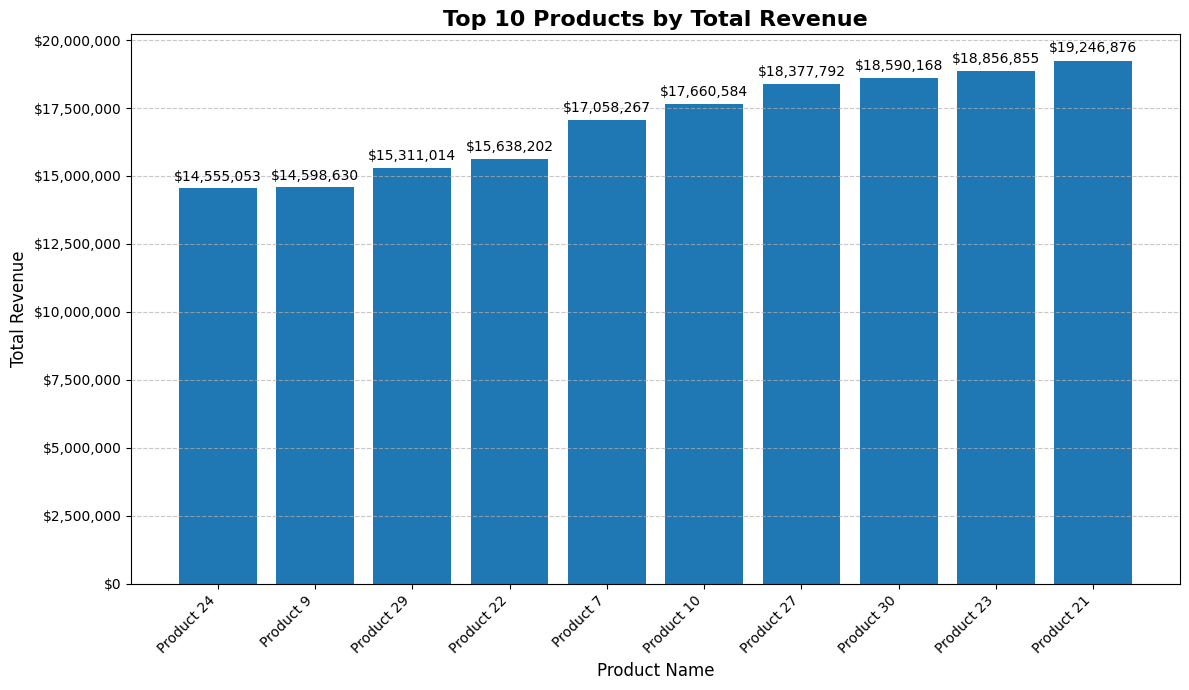

In [51]:
# Group by product_name and sum the revenue
top_products = (
    df.groupby('product_name')['revenue']
    .sum()
    .sort_values(ascending=True)
    .head(10)
    .reset_index()
)

# Create the bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(
    top_products['product_name'],
    top_products['revenue'],
    color='#1f77b4'
)

# Customize the chart
plt.title('Top 10 Products by Total Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + height * 0.01,  # Slightly above the bar
        f'${height:,.0f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Format y-axis with commas and dollar sign
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Add grid on y-axis for easier reading
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

📌 **Insights**
*  The top 10 products account for a large portion of total revenue, with a few products leading sales.
*   Strengthening mid-tier performers can help reduce reliance on top products and improve revenue balance.



 🔹5. **Bottom 10 Prodcuts by Total Revenue**

 Objective: Identify the lowest-revenue-generating products to highlight underperformers and uncover opportunities for improvement or optimization.

Visualization: Horizontal bar chart

EDA Category: Univariate analysis

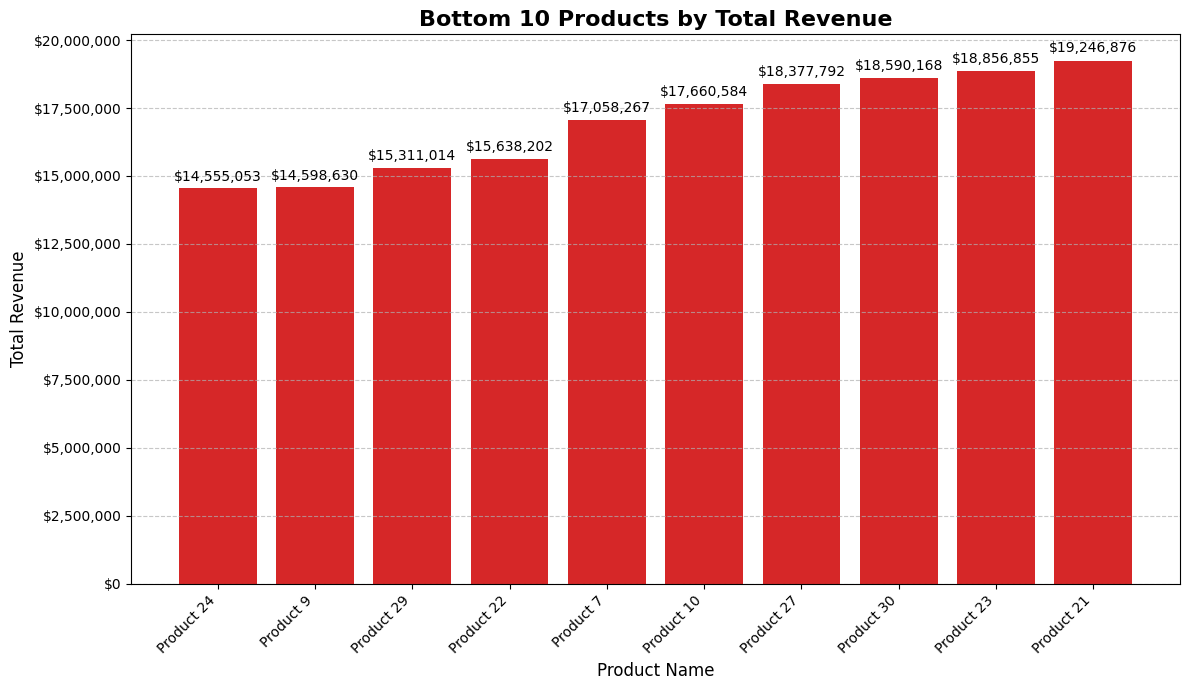

In [53]:
# Group by product_name and sum the revenue, then get bottom 10
bottom_products = (
    df.groupby('product_name')['revenue']
    .sum()
    .sort_values(ascending=True)  # Smallest first
    .head(10)
    .reset_index()
)

# Create the bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(
    bottom_products['product_name'],
    bottom_products['revenue'],
    color='#d62728'  # Red color to highlight low performers
)

# Customize the chart
plt.title('Bottom 10 Products by Total Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + height * 0.01,  # Slightly above the bar
        f'${height:,.0f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Format y-axis with commas and dollar sign
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Add grid on y-axis for easier reading
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

**Insights**
*  The lowest-performing products generate minimal revenue and exhibit similar sales patterns.
*  Strategic actions such as targeted promotions, pricing review, or product rationalization may be required.



🔹 5. **Sales by Channel (Pie Chart)**

Objective: Analyze how total sales are distributed across different sales channels to identify the most dominant routes to market.

Visualization: Pie chart

EDA Category: Univariate analysis


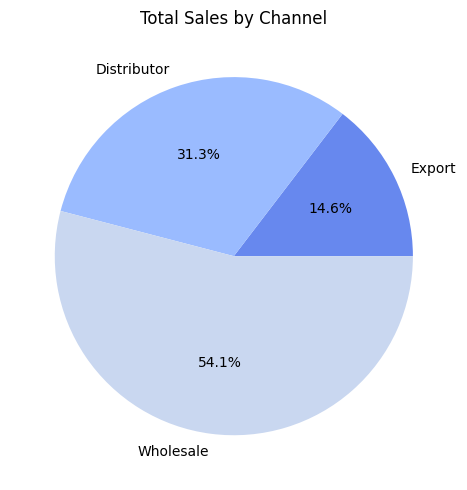

In [54]:
# Group revenue by sales channel and sort descending
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=True)

# Set figure size for the pie chart
plt.figure(figsize=(5,5))

# Plot pie chart with percentage labels and a defined start angle
plt.pie(
    chan_sales,
    labels = chan_sales.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm'),

)
# Add title for context
plt.title('Total Sales by Channel')

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Display the chart
plt.show()

**Insights**
* Wholesale contributes the largest share of sales at approximately 54%, followed by distributors at around 31% and exports at about 15%, indicating a strong dependence on domestic bulk channels.
*   Expanding export-focused strategies can help diversify revenue and reduce concentration risk.



🔹 **6. Average Order Value (AOV) Distribution**

Objective: Analyze the distribution of order values to understand common purchase amounts and detect potential outliers.

Visualization: Histogram

EDA Category: Univariate analysis

Design: Histogram with 50 bins and highlighted bar edges to clearly display the frequency of order values

AttributeError: module 'matplotlib.pyplot' has no attribute 'tight_Layout'

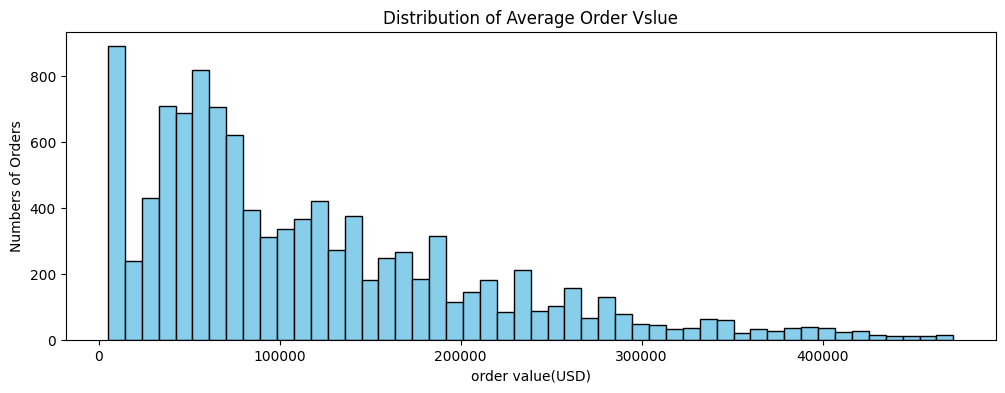

In [55]:
# Calculate the total revenue for each order to get the order value
aov = df.groupby('order_number')['revenue'].sum()

# Set the figure size for better visibility
plt.figure(figsize=(12,4))

# Plot a histogram of order values
plt.hist(
    aov,
    bins=50,
    color='skyblue',
    edgecolor='black'
)
# Add title and axis labels for context
plt.title('Distribution of Average Order Vslue')
plt.xlabel('order value(USD)')
plt.ylabel('Numbers of Orders')

# Adjust layout to prevent clipping
plt.tight_Layout()

# Show the plot
plt.show()



**Insights**
*   Order values show a strong right-skewed distribution, with the majority of transactions concentrated between approximately 60K and 120K.
*  A small number of high-value orders form a long upper tail, extending toward 500K, but they account for only a limited portion of overall order volume.



🔹**7.Unit Price Distribution Per Product**

 Goal: Compare pricing variability across different products to identify price consistency and outliers

Chart: Boxplot

EDA Type: Bivariate

Structure: Boxplot with rotated labels to display unit price spread per product

/tmp/ipython-input-3473151406.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


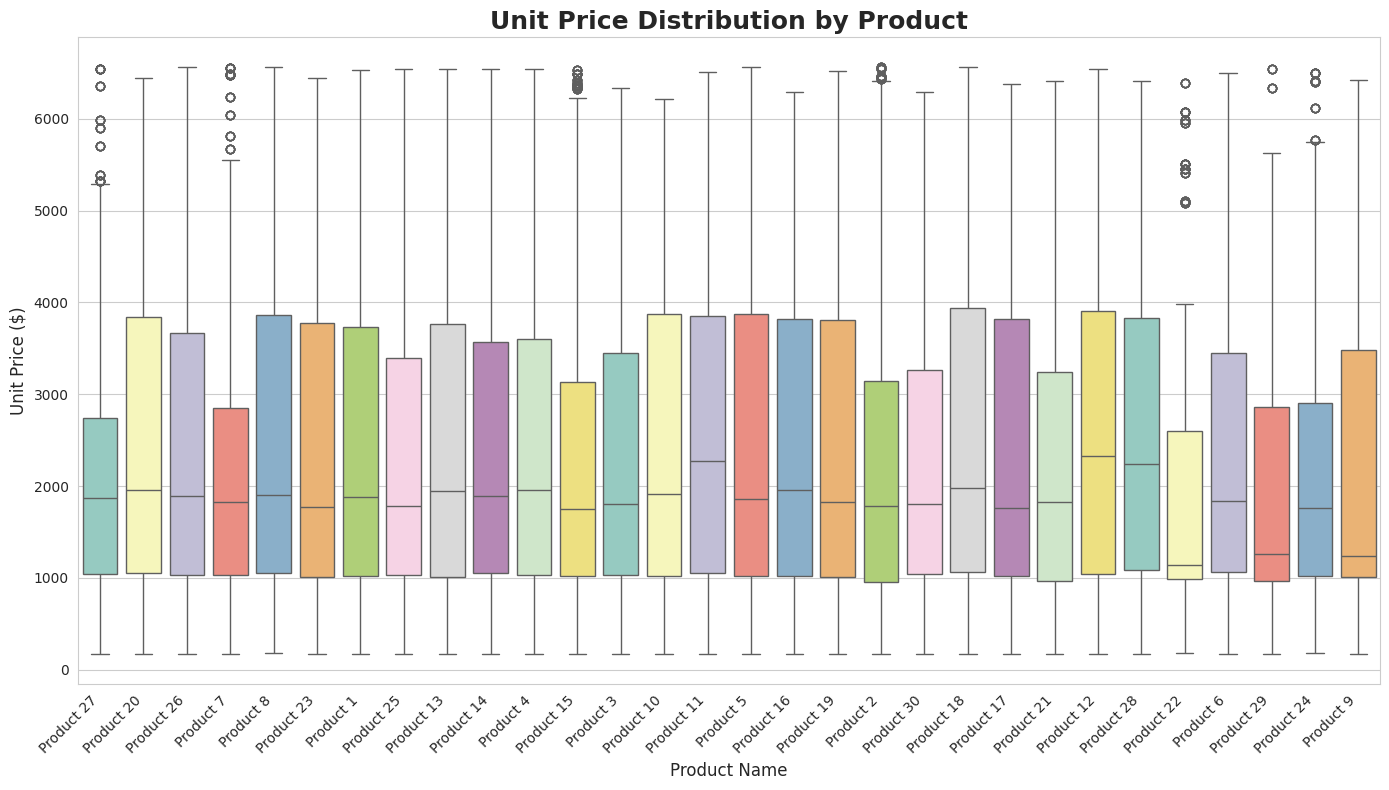

In [56]:
# Set style for better-looking plots
sns.set_style("whitegrid")

# Create the boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=df,
    x='product_name',
    y='unit_price',
    palette='Set3'  # Color palette; change to 'viridis', 'muted', etc. if preferred
)

# Customize the chart
plt.title('Unit Price Distribution by Product', fontsize=18, fontweight='bold')
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Unit Price ($)', fontsize=12)

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

# Optional: Add a stripplot to show individual data points (can be dense if many rows)
# sns.stripplot(data=df, x='product_name', y='unit_price', color='black', alpha=0.3, size=3)

# Tight layout
plt.tight_layout()

# Show plot
plt.show()

**Insights**
*   Products 8, 17, 27, 20, and 28 exhibit significant revenue spikes well above typical levels, likely driven by bulk orders, special-edition releases, or premium bundles.
*   Conversely, unusually low revenue points for Products 20 and 27—around 100—may reflect promotional giveaways or test SKUs that reduce average prices.
*  To obtain accurate margin and pricing evaluations, these outlier transactions should be excluded from average calculations. Afterwards, evaluate whether these anomalies should be formalized into recurring promotional strategies or phased out to maintain stable pricing performance.






🔹**8.Top 10 States by Revenue and Order Count**

Goal: Highlight the states contributing the most to revenue and compare them with their order volumes.

Chart Type: Dual bar charts

EDA Type: Multivariate analysis

Structure: The first chart presents the top 10 states by total revenue (in millions), while the second chart displays the top 10 states by total number of order

In [57]:
# Set style
sns.set_style("whitegrid")

# Group by state and calculate total revenue and order count
state_summary = (
    df.groupby('state')
    .agg({
        'revenue': 'sum',
        'order_number': 'nunique'  # Counts unique orders (assuming each row is an order line)
    })
    .rename(columns={'order_number': 'order_count'})
    .sort_values('revenue', ascending=False)
    .head(10)
    .reset_index()
)

# If your data has one row per order (not per product line), use 'order_number'.count() instead:
# 'order_number': 'count'

# Melt the data for easier plotting with seaborn
state_melted = state_summary.melt(
    id_vars='state',
    value_vars=['revenue', 'order_count'],
    var_name='metric',
    value_name='value'
)

# Create the plot
plt.figure(figsize=(14, 8))

# Bar plot
sns.barplot(
    data=state_melted,
    x='state',
    y='value',
    hue='metric',
    palette=['#1f77b4', '#ff7f0e']  # Blue for revenue, Orange for order count
)

# Customize
plt.title('Top 10 States by Total Revenue and Order Count', fontsize=18, fontweight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('')
plt.legend(title='Metric', labels=['Total Revenue ($)', 'Order Count'])

# Rotate x labels
plt.xticks(rotation=45, ha='right')

# Format y-axis differently based on metric (using twin axis for clarity)
# Alternative: Use two subplots (recommended for large scale differences)

# Better approach: Two subplots (one for revenue, one for order count)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Top: Revenue
sns.barplot(
    data=state_summary,
    x='state',
    y='revenue',
    ax=ax1,
    color='#1f77b4'
)
ax1.set_title('Top 10 States by Total Revenue', fontsize=16, fontweight='bold')
ax1.set_ylabel('Total Revenue ($)')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Bottom: Order Count
sns.barplot(
    data=state_summary,
    x='state',
    y='order_count',
    ax=ax2,
    color='#ff7f0e'
)
ax2.set_title('Corresponding Order Count', fontsize=14)
ax2.set_xlabel('State')
ax2.set_ylabel('Number of Orders')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Rotate x labels
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlap and display both charts
plt.tight_layout()
plt.show()

KeyError: 'state'

**Insights**
*  A few states consistently dominate revenue, indicating strong market presence and customer spending power in these regions.
*  Some states with high order counts do not necessarily generate the highest revenue, suggesting smaller average order values or frequent low-value purchases.
*  States that appear in both top revenue and top order charts represent key high-value markets worth prioritizing for marketing and expansion.
*  States with high order counts but lower revenue may benefit from upselling, cross-selling, or targeted promotions to increase average order value.









🔹**9. Average Profit Mragin by Channel**

Goal: Compare average profit margins across sales channels to identify the most and least profitable routes

Chart: Bar chart

EDA Type: Bivariate

Structure: Vertical bars with data labels showing margin percentages, sorted descending by channel

/tmp/ipython-input-3407102011.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


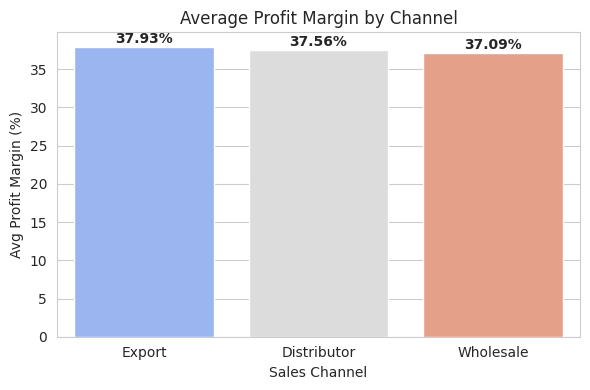

In [58]:
# 1️⃣ Compute average profit margin percentage for each channel
channel_margin = (
    df.groupby('channel')['profit_margin_pct']  # Group by sales channel
      .mean()                                  # Calculate mean profit margin %
      .sort_values(ascending=False)            # Sort channels from highest to lowest margin
)

# 2️⃣ Set the figure size for clarity
plt.figure(figsize=(6, 4))

# 3️⃣ Plot a bar chart of average profit margin by channel
ax = sns.barplot(
    x=channel_margin.index,    # X-axis: channel names
    y=channel_margin.values,   # Y-axis: average profit margin values
    palette='coolwarm'         # Color palette for bars
)

# 4️⃣ Add chart title and axis labels
plt.title('Average Profit Margin by Channel')  # Main title
plt.xlabel('Sales Channel')                    # X-axis label
plt.ylabel('Avg Profit Margin (%)')             # Y-axis label

# 5️⃣ Annotate each bar with its exact margin percentage
for i, v in enumerate(channel_margin.values):
  ax.text(
        i,                  # X position (bar index)
        v + 0.5,            # Y position (bar height + small offset)
        f"{v:.2f}%",        # Text label showing percentage with two decimals
        ha='center',        # Center-align the text horizontally
        fontweight='bold'   # Bold font for readability
    )

# 6️⃣ Adjust layout to prevent clipping and display the plot
plt.tight_layout()
plt.show()


**Insights**
*   Export leads with an average margin of 37.93%, followed closely by Distributor (37.56%) and Wholesale (37.09%).
*   The minimal margin difference (<0.2%) indicates consistently strong profitability across all channels, reflecting effective cost management and pricing control.
* To drive growth, focus on expanding Export volumes while maintaining operational efficiency in Distributor and Wholesale channels to sustain healthy margins.





🔹 **10.Top and Bottom 10 Customers by Revenue**

Goal: Highlight the customers generating the most and least revenue to inform targeted engagement and retention strategies.

Chart: Horizontal bar charts displayed side by side.

EDA Type: Multivariate

Structure: The left chart presents the top 10 customers ranked by revenue (in millions), while the right chart shows the bottom 10 customers by revenue (in millions).

/tmp/ipython-input-2018115719.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


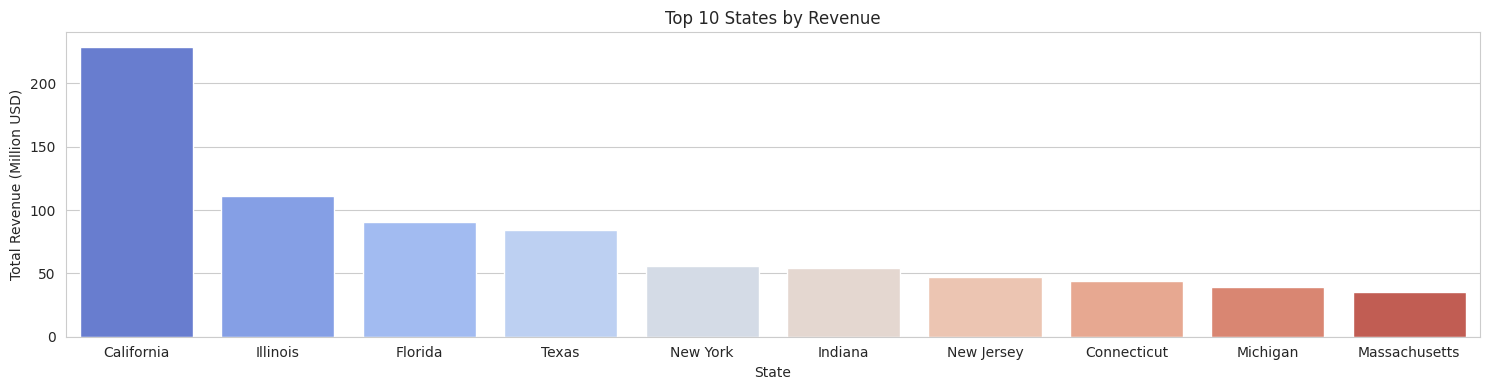

/tmp/ipython-input-2018115719.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


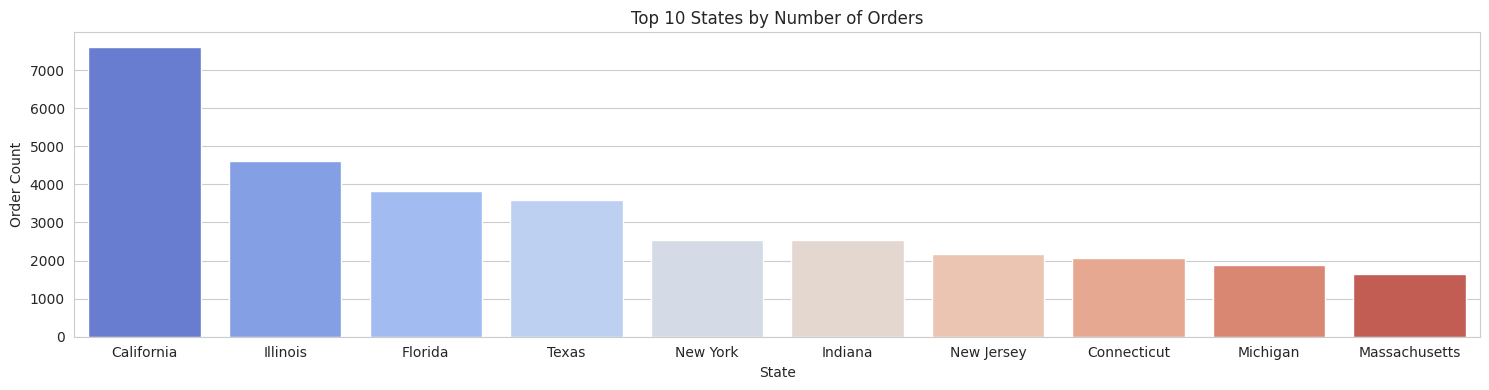

In [59]:
# Aggregate total revenue and unique order count per state
state_rev = df.groupby('state_name').agg(
    revenue=('revenue', 'sum'),          # Sum up revenue per state
    orders=('order_number', 'nunique')   # Count unique orders per state
).sort_values('revenue', ascending=False).head(10)  # Keep top 10 by revenue

# Plot 1: Top 10 states by revenue (scaled to millions)
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['revenue'] / 1e6,        # Y-axis: revenue in millions
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Revenue')     # Chart title
plt.xlabel('State')                       # X-axis label
plt.ylabel('Total Revenue (Million USD)') # Y-axis label
plt.tight_layout()                        # Adjust layout
plt.show()                                # Display the plot

# Plot 2: Top 10 states by number of orders
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['orders'],               # Y-axis: order counts
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Number of Orders')  # Chart title
plt.xlabel('State')                              # X-axis label
plt.ylabel('Order Count')                        # Y-axis label
plt.tight_layout()                               # Adjust layout
plt.show()                                       # Display the plot

🔹**11.Csutomer Segementation:Revenue vs Profit Margin**

Goal: Analyze customer segments based on total revenue and average profit margin, while emphasizing differences in order volume.

Chart: Bubble chart (scatter plot with point sizes representing order volume)

EDA Type: Multivariate

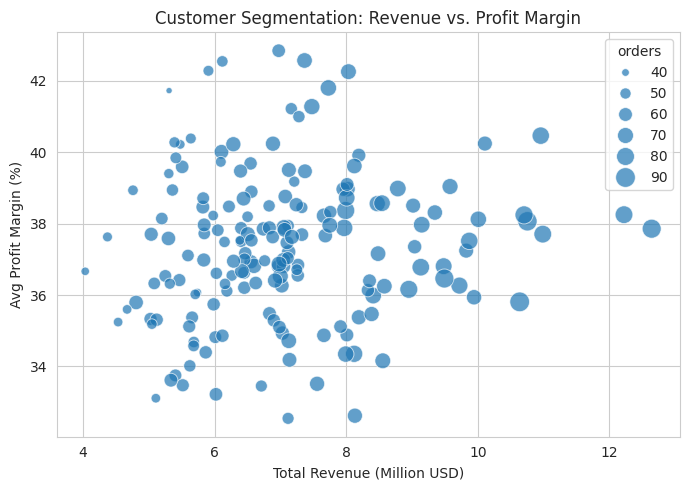

In [60]:
# Aggregate metrics per customer
cust_summary = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',        # <-- use revenue in millions
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  # <-- updated label
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()

**Insights**
* Customers below $6M exhibit the greatest margin variability (~33–43%), indicating more fluctuation in costs or discounting among smaller accounts.
* Bubble size (representing order count) grows with revenue, yet margins remain largely unaffected, highlighting revenue as the primary driver of performance rather than order volume.









🔹**12. Correlation HeatMap of Numeric Features**

Goal: Analyze relationships among key numerical variables to identify strong correlations and assess potential multicollinearity risks.

Chart: Correlation heatmap

EDA Type: Multivariate

Structure: Annotated heatmap displaying correlation coefficients across selected numerical features.

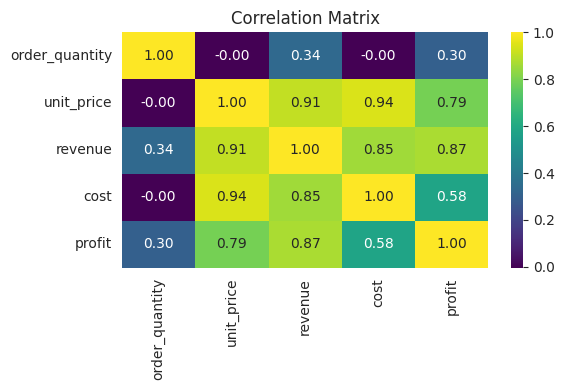

In [61]:
# List numeric columns to include in the correlation calculation
num_cols = ['order_quantity', 'unit_price', 'revenue', 'cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    corr,           # Data: correlation matrix
    annot=True,     # Display the correlation coefficients on the heatmap
    fmt=".2f",      # Format numbers to two decimal places
    cmap='viridis'  # Color palette for the heatmap
)

# Add title for context
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the heatmap
plt.show()

**Insights**
* Revenue and profit show a strong positive correlation (0.87), indicating that higher sales values generally translate into higher profitability.
*   Unit price emerges as a critical driver, with strong correlations to revenue (0.91), profit (0.79), and cost (0.94), demonstrating the broad impact of pricing on both earnings and expenses.
*   Cost is closely associated with revenue (0.85) but only moderately correlated with profit (0.58), suggesting that rising sales often increase expenses, while margins remain variable.
*   Quantity displays minimal correlation with unit price and cost (≈0.00) and only weak-to-moderate relationships with revenue (0.34) and profit (0.30), indicating that pricing has a greater influence on performance than volume.





In [63]:
df.to_csv('Sales_data(EDA Exported).csv', index=False)

**Saving Pre_processed DataFrame**


In [74]:
df


,order_number,order_date,customer name index,channel,currency code,warehouse code,delivery region index,product description index,order_quantity,unit_price,...,land_area,water_area,time_zone,budget,total_cost,profit,profit_margin_pct,order_month,order_month_name,order_month_num
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,268318796,13908113,America/New York,NaN,10946.058,4048.542,27.0,2014-01,Jan,1
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,72276415,1883,America/Indiana/Indianapolis,NaN,13969.098,11899.602,46.0,2014-01,Jan,1
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,62489257,386195,America/Los Angeles,NaN,4108.440,1760.760,30.0,2014-01,Jan,1
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,60221613,475857,America/Indiana/Indianapolis,NaN,7201.964,9166.136,56.0,2014-01,Jan,1
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,70972793,720300,America/New York,NaN,10082.160,8249.040,45.0,2014-01,Jan,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,...,26311722,253129,America/New York,NaN,11765.736,10022.664,46.0,2018-02,Feb,2
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,...,35271964,370235,America/Chicago,NaN,3474.486,1711.314,33.0,2018-02,Feb,2
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,...,22943340,594611,America/New York,NaN,29133.610,14349.390,33.0,2018-02,Feb,2
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,...,76228647,162756,America/New York,NaN,20511.246,7206.654,26.0,2018-02,Feb,2


In [75]:
# Export Final DataFrame to CSV
df.to_csv('Sales_data(EDA Exported).csv', index=False)

🔍 **Key Insights**
* **Monthly Revenue Trend**:

  Revenue remained stable at ~$26–27M from 2014–2017 with no strong seasonality; a sharp dip in early 2017 suggests a one-time disruption.

* **Channel Mix:**

   Wholesale leads revenue (54%), followed by Distributors (31%) and Exports (15%), highlighting clear potential for international expansion.
* **Product Performance:**

     Product 26 is the top revenue driver (~$110M), with Product 13 as a strong second; lower-tier products trail consistently at ~$52–57M.
*  **Profit Margins**:
     
     Margins range widely (~18–60%) and show little sensitivity to unit price, suggesting standardized pricing across product tiers.

*   **Order Seasonality:**
    
    No strong monthly pattern is observed, though a slight volume uptick occurs in May–June; the early-2017 dip indicates a possible one-time disruption.

*   **Regional Performance**:
     
     California dominates (~$230M revenue, 7,500+ orders), followed by Illinois, Florida, and Texas; New York and Indiana contribute at a lower but steady level.






**Recommendations**

**1.Outline recommendations**
Separate bulk orders and promotional SKUs from regular transactions to ensure accurate average and margin calculations.*  
*2.*Margin Optimization**:Extend successful pricing strategies from top-performing products to mid- and low-tier items, while reducing costs for underperforming SKUs.

**3.Export Expansion:**
Strengthen international revenue by investing in targeted overseas marketing and strategic distributor partnerships

**4.Seasonal Planning:**
Reallocate marketing and inventory efforts toward the January slowdown and the May–June uplift; conduct a root-cause analysis of the 2017 revenue dip.

**5.Dashboard Readiness**
:Create summarized datasets for trends, channel mix, and product performance to enable efficient Power BI reporting.
  









*  



